In [11]:
import numpy
import time
import matplotlib.pyplot as plt

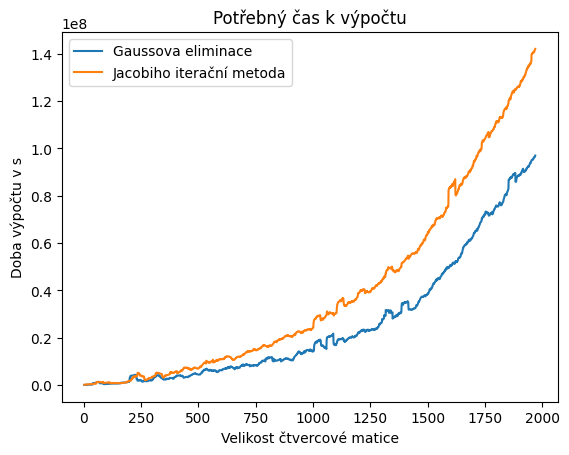

In [22]:
def jacobi_method(A, b, n_iterations, x0):
    x = x0
    D = numpy.diag(A)
    L = numpy.tril(A, k=-1)
    U = numpy.triu(A, k=1)
    for i in range(n_iterations):
        x = (b - numpy.matmul((L + U), x)) / D
        if numpy.allclose(x, numpy.linalg.solve(A, b), rtol=1e-8, atol=1e-9):
            break
    return x

def gaussian_elimination(A, b):
    x = numpy.linalg.solve(A, b)
    return x

g_time = []
j_time = []

for M in range(2, 2000):
    a = numpy.ones(M)
    A1 = numpy.diagflat([a])
    A2 = numpy.ones((M, M), dtype=int)
    A = A1 + A2
    b = numpy.ones(M) * (M + 1)

    gstart = time.perf_counter()
    gaussian_elimination(A, b)
    gend = time.perf_counter()
    g = round((gend - gstart) * 1e9)

    jstart = time.perf_counter()
    jacobi_method(A, b, 100, numpy.ones(len(A)))
    jend = time.perf_counter()
    j = round((jend - jstart) * 1e9)

    g_time.append(g)
    j_time.append(j)

x = numpy.arange(2, 1970)

# Smoothing for better readability from the plot
g_time_smoothed = numpy.convolve(g_time, numpy.ones(30)/30, mode="same")
j_time_smoothed = numpy.convolve(j_time, numpy.ones(30)/30, mode="same")
g_time_smoothed = g_time_smoothed[:-30]
j_time_smoothed = j_time_smoothed[:-30]

plt.plot(x, g_time_smoothed, label="Gaussova eliminace")
plt.plot(x, j_time_smoothed, label="Jacobiho iterační metoda")
plt.title("Potřebný čas k výpočtu")
plt.xlabel("Velikost čtvercové matice")
plt.ylabel("Doba výpočtu v s")
plt.legend(loc="upper left")
plt.show()